In [1]:
!pip install pycaret

## Importing data as pandas DataFrame

In [2]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

## Setting aside 10% unseen data

In [4]:
data_unseen = df.sample(frac=0.1, random_state=42)
df = df.drop(data_unseen.index)

df.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Model Training & Validation: ' + str(df.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Model Training & Validation: (256326, 31)
Unseen Data For Predictions: (28481, 31)


In [5]:
from pycaret.classification import *

In [6]:
exp_clf = setup(data = df,
                normalize = True,
                target = 'Class',
                session_id=123,
                train_size=0.8,
                ignore_features=['Time'],
                fix_imbalance = True
                )


,Description,Value
0,session_id,123
1,Target,Class
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(256326, 31)"
5,Missing Values,False
6,Numeric Features,29
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [8]:
df.shape

(256326, 31)

In [8]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [9]:
best5 = compare_models(sort="F1", fold=5, n_select=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9995,0.9624,0.8098,0.8651,0.8357,0.8354,0.8363,32.988
rf,Random Forest Classifier,0.9994,0.9654,0.7926,0.8361,0.8133,0.8130,0.8135,189.050
lightgbm,Light Gradient Boosting Machine,0.9986,0.9669,0.8358,0.5724,0.6768,0.6762,0.6897,7.536
dt,Decision Tree Classifier,0.9973,0.8736,0.7494,0.3619,0.4875,0.4863,0.5193,22.038
gbc,Gradient Boosting Classifier,0.9890,0.9759,0.8877,0.1250,0.2185,0.2162,0.3298,416.536
ridge,Ridge Classifier,0.9888,0.0000,0.8157,0.1129,0.1982,0.1959,0.3008,0.444
lda,Linear Discriminant Analysis,0.9888,0.9621,0.8157,0.1129,0.1982,0.1959,0.3008,2.426
ada,Ada Boost Classifier,0.9774,0.9626,0.8763,0.0621,0.1159,0.1131,0.2296,75.248
nb,Naive Bayes,0.9761,0.9540,0.8531,0.0576,0.1079,0.1050,0.2180,0.944
svm,SVM - Linear Kernel,0.9741,0.0000,0.8993,0.0574,0.1076,0.1047,0.2225,1.026


## Best 5 models based on F1 scores

In [10]:
for model in best5:
    print(model)
    print()

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=Fal

## Fine tuning the models

In [12]:
et = best5[0]

tuned_et = tune_model(et, fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9992,0.9854,0.8116,0.7368,0.7724,0.7720,0.7729
1,0.9993,0.9724,0.8841,0.7439,0.8079,0.8076,0.8106
2,0.9989,0.9779,0.8261,0.6196,0.7081,0.7075,0.7149
3,0.9990,0.9851,0.8429,0.6629,0.7421,0.7416,0.7470
4,0.9990,0.9444,0.7429,0.6842,0.7123,0.7118,0.7124
Mean,0.9991,0.9731,0.8215,0.6895,0.7486,0.7481,0.7516
SD,0.0002,0.0151,0.0462,0.0465,0.0377,0.0377,0.0370


In [19]:
rf = best5[1]

params = {
    'max_depth' : [5, 7, 9]
}
tuned_rf = tune_model(rf, custom_grid = params, fold = 3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9979,0.9747,0.8534,0.4400,0.5806,0.5797,0.6120
1,0.9980,0.9846,0.8261,0.4545,0.5864,0.5855,0.6120
2,0.9977,0.9736,0.7931,0.4035,0.5349,0.5338,0.5647
Mean,0.9979,0.9776,0.8242,0.4327,0.5673,0.5664,0.5962
SD,0.0002,0.0049,0.0247,0.0215,0.0231,0.0231,0.0223


In [16]:
lightgbm = best5[2]

tuned_lightgbm = tune_model(lightgbm, fold = 3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9995,0.9792,0.8621,0.8264,0.8439,0.8436,0.8438
1,0.9993,0.9906,0.8435,0.7462,0.7918,0.7915,0.7930
2,0.9992,0.9606,0.8017,0.7561,0.7782,0.7779,0.7782
Mean,0.9993,0.9768,0.8358,0.7762,0.8047,0.8043,0.8050
SD,0.0001,0.0123,0.0252,0.0357,0.0283,0.0283,0.0281


In [20]:
dt = best5[3]

tuned_dt = tune_model(dt, fold = 3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9983,0.5,0.0,0.0,0.0,0.0,0.0
1,0.9983,0.5,0.0,0.0,0.0,0.0,0.0
2,0.9983,0.5,0.0,0.0,0.0,0.0,0.0
Mean,0.9983,0.5,0.0,0.0,0.0,0.0,0.0
SD,0.0000,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
print(tuned_et, "\n")
print(rf, "\n")
print(tuned_lightgbm, "\n")
print(tuned_dt, "\n")
print(gbc)

ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='entropy',
                     max_depth=4, max_features='log2', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0002,
                     min_impurity_split=None, min_samples_leaf=5,
                     min_samples_split=9, min_weight_fraction_leaf=0.0,
                     n_estimators=130, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_job

## Blending the best 5 models

In [25]:
blended_model = blend_models(estimator_list=[tuned_et, rf, tuned_lightgbm, tuned_dt, gbc], method = 'soft', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9992,0.9864,0.8261,0.7403,0.7808,0.7804,0.7816
1,0.9994,0.9772,0.8696,0.8000,0.8333,0.8330,0.8338
2,0.9991,0.9801,0.8406,0.6988,0.7632,0.7627,0.7660
3,0.9991,0.9868,0.8857,0.6739,0.7654,0.7650,0.7722
4,0.9991,0.9585,0.7714,0.7200,0.7448,0.7444,0.7448
Mean,0.9992,0.9778,0.8387,0.7266,0.7775,0.7771,0.7797
SD,0.0001,0.0103,0.0396,0.0428,0.0302,0.0302,0.0296


## Predictions on testing data

In [26]:
predict_model(blended_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9993,0.985,0.8687,0.8037,0.835,0.8346,0.8353


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Label,Score
0,0.524233,0.119204,-0.085356,0.701865,0.453158,0.483900,0.183377,0.201014,-0.229067,-0.130196,0.794478,0.456967,-0.592628,0.835421,1.970286,-1.779637,1.225940,-2.817829,-2.373914,-0.376592,0.204781,0.790909,0.014343,-1.056159,0.905613,-0.387936,0.143075,0.006585,-0.259456,0,0,0.8252
1,-1.786845,1.796177,0.794213,-0.593149,-0.289777,-0.262717,0.518923,-0.404028,1.306142,3.023594,1.696303,0.876260,0.698839,-1.115344,0.491566,0.003044,-1.139538,0.101100,0.135250,1.275303,-0.122871,-0.180951,-0.311639,0.530512,0.628533,0.098581,-3.461877,-0.848029,-0.349760,0,0,0.8400
2,-1.078593,0.195376,0.069546,2.389938,-0.480623,0.537727,0.311935,0.205141,0.316210,1.422722,-2.155237,-0.719861,-1.185157,-0.499095,-2.099169,1.162483,-0.783876,-0.406379,-1.751851,-1.724124,-0.261818,0.266047,0.953833,-0.233541,-4.674622,-1.576477,-2.476708,0.484769,0.327420,0,0,0.7982
3,-0.117870,0.737413,-0.398745,0.588015,0.426193,-0.347838,0.431194,0.289495,-0.436502,0.005429,-1.336189,-0.569373,-0.752125,1.002378,0.840439,-0.383165,-0.179064,0.520108,0.330121,-0.085097,0.567364,1.711295,-0.016560,0.985417,-1.538220,-0.948095,1.047450,0.800918,-0.305551,0,0,0.8357
4,-0.610991,0.925953,0.155771,-0.234648,0.025961,0.145381,-0.109125,0.874106,-0.796674,-0.439315,0.402510,0.743419,0.122966,1.017477,0.241505,0.515471,-0.361689,0.068366,0.321736,-0.202535,-0.004457,-0.302203,0.028093,-1.347955,-0.853745,0.292605,-0.067332,0.198927,-0.347674,0,0,0.8451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51261,0.843584,-0.466144,-0.663922,0.354477,-0.450744,-0.864730,0.254622,-0.298173,0.875177,-0.293224,-0.424763,1.041282,0.411490,0.059781,-0.333774,-0.795863,0.095790,-1.085781,0.079299,0.192944,-0.021086,-0.228762,0.165535,0.727843,-0.350176,-0.272718,-0.129712,-0.057636,0.405770,0,0,0.8429
51262,-1.963708,-2.987904,1.600999,-0.627499,-0.361426,0.004959,-0.410814,0.615333,2.389459,-2.415130,-0.955365,0.320532,-1.818767,-0.808387,-0.531354,-1.722715,1.353280,-0.420178,-0.317693,2.351497,1.043569,1.160434,2.545557,0.127535,1.358040,0.378289,-0.431800,0.496379,2.156250,0,0,0.8288
51263,0.833016,-0.516188,-1.074763,0.291261,-0.204190,-0.910112,0.425628,-0.384079,0.357116,0.056584,-0.790848,0.129833,0.165402,0.484161,0.727584,0.123287,-0.612746,-0.232939,-0.309812,0.385207,0.468386,0.795426,-0.288186,-0.033528,-0.019470,1.595796,-0.339959,-0.090149,0.636966,0,0,0.8460
51264,0.466420,-0.246570,0.580531,0.897271,-0.627639,-0.065175,-0.284250,0.026228,0.463842,-0.061106,-0.879841,0.025586,0.299892,-0.050229,1.615716,0.977550,-1.055674,0.662387,-0.713022,0.279678,0.243732,0.296505,-0.330105,-0.192588,0.677333,-0.686979,0.085676,0.190664,0.291154,0,0,0.8417


## Precision-Recall curve

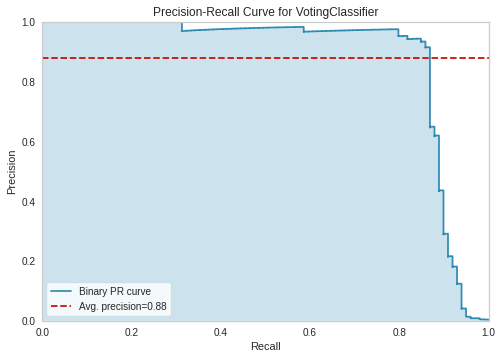

In [27]:
plot_model(blended_model, plot = 'pr')

## Confusion matrix

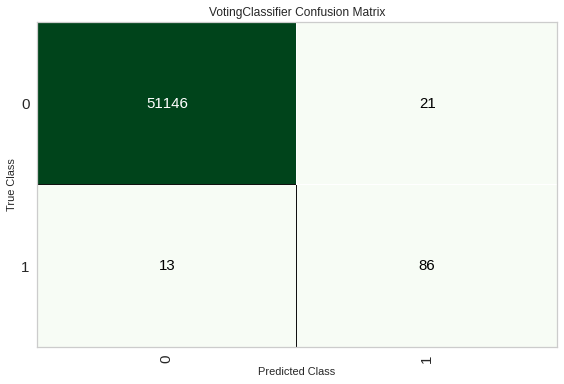

In [28]:
plot_model(blended_model, plot = 'confusion_matrix')

## Predictions on the unseen data

In [29]:
unseen_predictions = predict_model(blended_model, data=data_unseen)
unseen_predictions.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Label,Score
0,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,-14.110184,5.299236,-10.834006,1.671120,-9.373859,0.360806,-9.899247,-19.236292,-8.398552,3.101735,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19,1,1,0.8814
1,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,-0.565012,-0.087670,0.979427,0.076883,-0.217884,-0.136830,-2.142892,0.126956,1.752662,0.432546,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12,0,0,0.8430
2,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,0.756801,0.543827,0.112453,1.075384,-0.245772,0.180483,1.769860,-0.533172,-0.533300,1.192245,0.212877,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00,0,0,0.8454
3,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,-1.376648,-1.328335,0.223621,1.132627,-0.550875,0.616568,0.497974,0.502195,0.981343,0.101264,-0.244633,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50,0,0,0.8396
4,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,0.259452,0.942162,0.850038,-0.616166,0.592634,-0.603845,0.091077,-0.471867,-0.333816,0.404711,-0.255293,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89,0,0,0.8441


## Saving the model

In [31]:
save_model(blended_model, "/content/drive/MyDrive/Colab Notebooks/blended_model")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['Time'], id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Class',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_...
                                                                           min_impurity_decrease=0.0,
                                                                           min_impurity_split=None,
                                                                        